In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Handling Imbalanced Data for Credit Card Fraud Detection

### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/capstone/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape



(284807, 31)

In [ ]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
data.dropna(inplace=True)
data.shape

(284807, 31)

In [ ]:
data = data.drop(axis = 1, columns = 'Time')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
scaler = StandardScaler()#ölçeklendirme
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### **Correlation Matrix of Real Data Set**

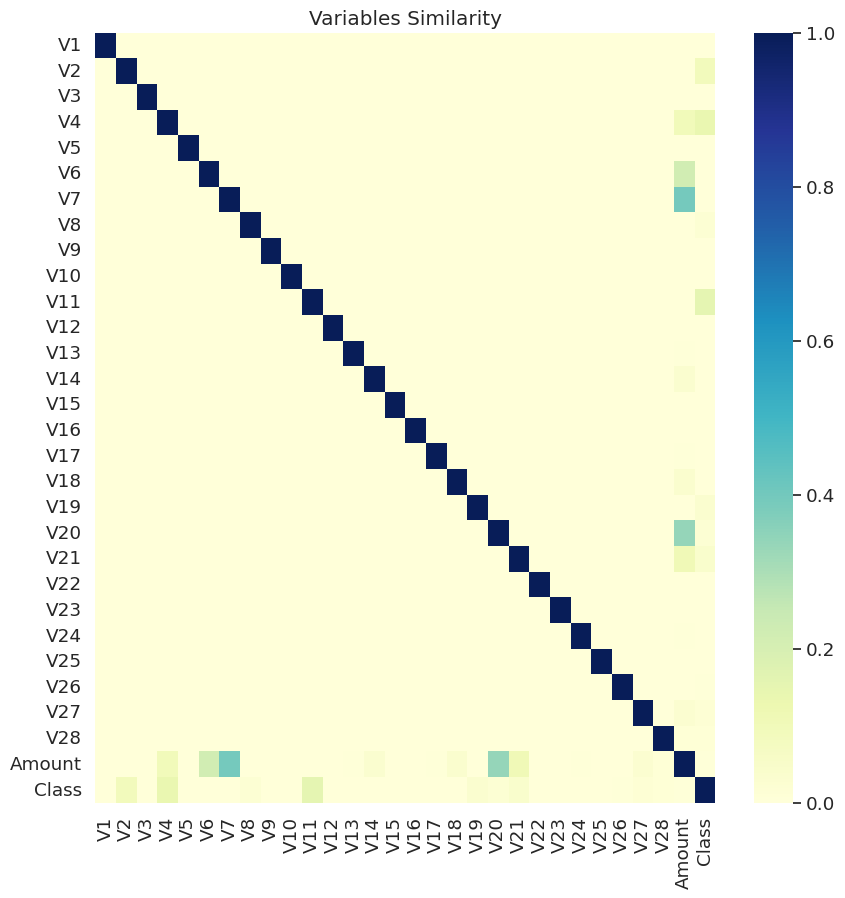

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
def plot_similarity(labels, features, rotation):
    corr = features.corr()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Variables Similarity")

plot_similarity(data.columns, data, 90)

In [ ]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]

data_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [ ]:
X = data.drop("Class", axis = 1)
y = data.Class
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

###**Reduce Dimension with PCA**

In [ ]:
data_copy = data
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

,0,1,label
0,1.322307,-0.389198,0
1,-1.269697,-0.078926,0
2,1.834492,1.341432,0
3,0.947017,-0.207803,0
4,0.936999,-1.141137,0
...,...,...,...
284802,9.982360,-10.374884,0
284803,0.538774,-0.639278,0
284804,-1.756410,0.934776,0
284805,0.056939,-0.688398,0


### **Distribution of Data Set**

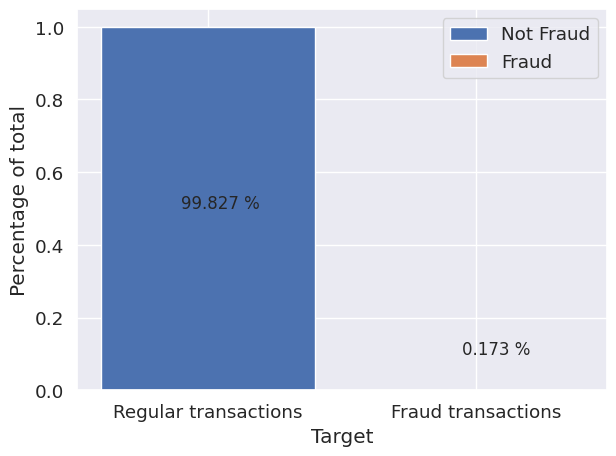

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio_ones = data.Class.mean()
ratio_zeros = (len(data) - data.Class.sum())/len(data)

plt.bar('Regular transactions', height=ratio_zeros, label='Not Fraud')
plt.bar('Fraud transactions', height=ratio_ones, label='Fraud')
plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()

### **Distribution of Data Set on Two Dimension**

In [ ]:
px.scatter(df, x = 0, y = 1, color = df.label.astype(str))

### **Generative Adversarial Network**

### **Building Generator**

In [ ]:
def build_generator():
  model = Sequential()#tensoeroflowdan aldığımız sequaletial model

  model.add(Dense(32, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))#for noise
  model.add(BatchNormalization())# for speed up and better performans

  #defining the hidden layer
  model.add(Dense(64, activation = 'relu'))
  model.add(BatchNormalization())# for speed up and better performans

  #defining the second hidden layer
  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())# for speed up and better performans

  #definig the output layer
  model.add(Dense(29, activation = 'linear')) #number of input (num of fetures of our data set)#preporcess ederek lineer yaotık
  model.summary()

  return model
build_generator()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               5

### **Building Discriminator**

In [ ]:
def build_discriminator():
  model = Sequential()

  #imput layer
  model.add(Dense(128, input_dim = 29, activation = 'relu', kernel_initializer = 'he_uniform'))

  #hidden layer
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))


  model.add(Dense(1, activation = 'sigmoid'))#1 ile 0 arasında deperler döndürdüğü için sigmmoid
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

  model.summary()
  return model
build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 15777

# **Building Generative Adversarial Network**

In [ ]:
def build_gan(generator, discriminator):
  #for freezing dicriminator for train (bunu yapmazsak discriminator fake datayı anlar her seferinde bu sebebten fake data oluşturamayız)
  discriminator.trainable = False#yapmazsak  generator progress sağlayamaz çünkü discrimintor atasını hep yakalar
  #en son trrin edince discriminator her seferinde daha iyi olucak çünkü generator kendini daha iyi eğiticek

  #input layer of gand  EQUAL to input layer of generator
  gan_input = Input(shape = (generator.input_shape[1],))
  #pass data from input layer to discriminator
  x = generator(gan_input)
  gan_output = discriminator(x)

  #creating gan model
  gan = Model(gan_input, gan_output)
  gan.summary()
  return gan


### **Generate Synthetic Data**

In [ ]:
def generate_synthetic_data(generator, numberOfSamples):
    noise = np.random.normal(0, 1, (numberOfSamples, generator.input_shape[1]))
    fake_data = generator.predict(noise)
    # Sütunları 'V1', 'V2', 'V3',... şeklinde adlandırma
    fake_data_df = pd.DataFrame(fake_data, columns=[f'V{i}' for i in range(1, generator.input_shape[1] + 1)])
    return fake_data_df


In [ ]:
def monitor_generator(generator, num_now , num_target, num):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    synthetic_fraud_data = generate_synthetic_data(generator, 492)
    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    df_combined = pd.concat([df_real, df_fake])

    if(num == 990):
        plt.figure()
        sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
        plt.show()




### **Training Discriminaor**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_5 (Bat  (None, 128)              

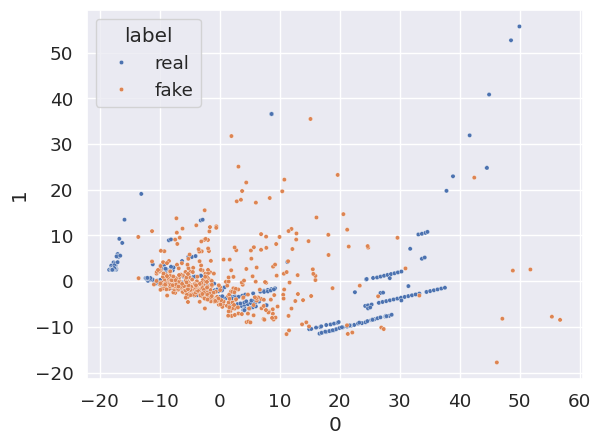

epoch : 990
1/1 [==============================] - 0s 20ms/step


In [ ]:
generator = build_generator()
discriminator = build_discriminator()

gan = build_gan(generator=generator, discriminator= discriminator)
gan.compile(optimizer = 'adam', loss = 'binary_crossentropy')

num_of_epochs = 1000
batch_size = 64
half_batch = int (batch_size / 2)

for epoch in range(num_of_epochs):
  # we are generate 32 data point our generator
  X_fake = generate_synthetic_data(generator= generator, numberOfSamples= half_batch)
  #define label thats are going to indicate that this half a batch is synthetic fraudulent
  y_fake = np.zeros((half_batch,1))

  X_real = data_fraud.drop("Class", axis = 1).sample(half_batch)
  y_real = np.ones((half_batch,1))

  discriminator.trainable = True

  discriminator.train_on_batch(X_real, y_real)
  discriminator.train_on_batch(X_fake, y_fake)
  #discriminator learn how to distinguish fake or real

  noise = np.random.normal(0,1, (batch_size , 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch % 10 == 0:
    monitor_generator(generator= generator,num_now= epoch,num_target=num_of_epochs, num=epoch)
    print("epoch :" , epoch)






In [ ]:
df

,0,1,label
0,1.322307,-0.389198,0
1,-1.269697,-0.078926,0
2,1.834492,1.341432,0
3,0.947017,-0.207803,0
4,0.936999,-1.141137,0
...,...,...,...
284802,9.982360,-10.374884,0
284803,0.538774,-0.639278,0
284804,-1.756410,0.934776,0
284805,0.056939,-0.688398,0


### **Merging Fraud Datas**

In [ ]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)
df['label'] = 'fake'
df_2 = data_fraud.drop('Class', axis = 1)
df_2['label'] = 'real'

df_2.columns = df.columns


combined_df = pd.concat([df,df_2])
combined_df


32/32 [==============================] - 0s 2ms/step


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,label
0,-2.339366,3.436717,-4.243663,3.265396,-1.947187,-0.752959,-5.245365,0.225372,-2.309194,-5.449416,...,2.722800,0.323420,0.372412,-0.373205,-0.342407,0.285651,0.988622,-0.214574,0.341512,fake
1,-4.091477,10.298469,-10.746875,7.079628,-0.071816,-2.978577,-7.981906,-1.407997,-4.251163,-8.446654,...,4.345114,0.078568,0.744290,-1.898145,-0.302504,1.048397,1.245533,-0.470825,-0.905321,fake
2,-1.520571,0.924623,-1.034942,0.805793,-1.601852,1.022921,-1.169381,-1.038363,-0.071833,-2.543780,...,1.064964,-0.855996,-0.034638,-0.042917,-0.173348,0.161729,0.306642,-0.390229,1.540266,fake
3,-0.559667,5.171281,-7.853243,5.667122,-2.285380,-2.176084,-5.576393,0.063346,-1.931611,-6.883722,...,2.791500,0.742079,0.922243,-0.502930,-0.492086,-0.021666,1.858156,-0.106368,0.512892,fake
4,-1.346543,2.918716,-6.394751,10.158560,1.558286,-1.804574,-1.778213,2.721694,-5.362366,-0.811260,...,-2.422602,-3.484062,0.376281,0.733136,-0.295444,-0.520667,-1.750351,1.893382,-0.584241,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,real
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,real
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,real
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,real


In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,label
0,-2.339366,3.436717,-4.243663,3.265396,-1.947187,-0.752959,-5.245365,0.225372,-2.309194,-5.449416,...,2.722800,0.323420,0.372412,-0.373205,-0.342407,0.285651,0.988622,-0.214574,0.341512,fake
1,-4.091477,10.298469,-10.746875,7.079628,-0.071816,-2.978577,-7.981906,-1.407997,-4.251163,-8.446654,...,4.345114,0.078568,0.744290,-1.898145,-0.302504,1.048397,1.245533,-0.470825,-0.905321,fake
2,-1.520571,0.924623,-1.034942,0.805793,-1.601852,1.022921,-1.169381,-1.038363,-0.071833,-2.543780,...,1.064964,-0.855996,-0.034638,-0.042917,-0.173348,0.161729,0.306642,-0.390229,1.540266,fake
3,-0.559667,5.171281,-7.853243,5.667122,-2.285380,-2.176084,-5.576393,0.063346,-1.931611,-6.883722,...,2.791500,0.742079,0.922243,-0.502930,-0.492086,-0.021666,1.858156,-0.106368,0.512892,fake
4,-1.346543,2.918716,-6.394751,10.158560,1.558286,-1.804574,-1.778213,2.721694,-5.362366,-0.811260,...,-2.422602,-3.484062,0.376281,0.733136,-0.295444,-0.520667,-1.750351,1.893382,-0.584241,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.561563,-2.925496,-2.801983,5.736936,-3.012101,-0.449952,-0.099527,2.497643,-3.352686,-0.374215,...,-1.773165,-1.415380,-0.566484,1.284594,-1.382497,-0.101888,-0.492155,1.758299,3.251360,fake
996,-2.267225,1.083658,-2.209031,0.777573,-1.990349,0.323444,-1.608570,-0.463041,-0.231183,-2.283491,...,0.848115,-0.092787,-0.372046,-0.044033,-0.495304,-0.105713,1.352705,0.069535,1.571946,fake
997,-5.125737,-2.845407,-5.176105,4.683560,-6.016253,-2.060799,-0.286553,2.684084,-3.143005,-3.306547,...,-0.392124,-1.104244,-0.398120,1.282633,-2.058663,-0.072894,-0.605078,1.810397,4.960832,fake
998,-2.793158,6.426702,-6.256073,5.713631,-4.741004,-1.731950,-8.143847,0.182647,-1.585242,-8.923915,...,4.475972,-0.358051,1.471047,-0.690392,-0.539555,0.070878,0.627737,0.153112,-0.285583,fake


In [ ]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()


<ipython-input-24-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### **Precision, Recall and F1-Score's of Synthetic Data Production**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = combined_df.drop("label", axis=1)
y = combined_df["label"]

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier oluştur
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# RandomForestClassifier'ı eğit
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = rf_classifier.predict(X_test)

# Sınıflandırma raporu ve karışıklık matrisi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

        fake       0.96      1.00      0.98       193
        real       1.00      0.92      0.96       106

    accuracy                           0.97       299
   macro avg       0.98      0.96      0.97       299
weighted avg       0.97      0.97      0.97       299

[[193   0]
 [  8  98]]
              precision    recall  f1-score   support

        fake       0.96      1.00      0.98       193
        real       1.00      0.92      0.96       106

    accuracy                           0.97       299
   macro avg       0.98      0.96      0.97       299
weighted avg       0.97      0.97      0.97       299



In [ ]:
combined_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,label
0,-2.339366,3.436717,-4.243663,3.265396,-1.947187,-0.752959,-5.245365,0.225372,-2.309194,-5.449416,...,2.722800,0.323420,0.372412,-0.373205,-0.342407,0.285651,0.988622,-0.214574,0.341512,fake
1,-4.091477,10.298469,-10.746875,7.079628,-0.071816,-2.978577,-7.981906,-1.407997,-4.251163,-8.446654,...,4.345114,0.078568,0.744290,-1.898145,-0.302504,1.048397,1.245533,-0.470825,-0.905321,fake
2,-1.520571,0.924623,-1.034942,0.805793,-1.601852,1.022921,-1.169381,-1.038363,-0.071833,-2.543780,...,1.064964,-0.855996,-0.034638,-0.042917,-0.173348,0.161729,0.306642,-0.390229,1.540266,fake
3,-0.559667,5.171281,-7.853243,5.667122,-2.285380,-2.176084,-5.576393,0.063346,-1.931611,-6.883722,...,2.791500,0.742079,0.922243,-0.502930,-0.492086,-0.021666,1.858156,-0.106368,0.512892,fake
4,-1.346543,2.918716,-6.394751,10.158560,1.558286,-1.804574,-1.778213,2.721694,-5.362366,-0.811260,...,-2.422602,-3.484062,0.376281,0.733136,-0.295444,-0.520667,-1.750351,1.893382,-0.584241,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,real
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,real
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,real
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,real


In [ ]:
combined_df
combined_df.rename(columns={'label': 'Class'}, inplace=True)
combined_df['Class'] = 1
combined_df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Class
0,-2.339366,3.436717,-4.243663,3.265396,-1.947187,-0.752959,-5.245365,0.225372,-2.309194,-5.449416,...,2.722800,0.323420,0.372412,-0.373205,-0.342407,0.285651,0.988622,-0.214574,0.341512,1
1,-4.091477,10.298469,-10.746875,7.079628,-0.071816,-2.978577,-7.981906,-1.407997,-4.251163,-8.446654,...,4.345114,0.078568,0.744290,-1.898145,-0.302504,1.048397,1.245533,-0.470825,-0.905321,1
2,-1.520571,0.924623,-1.034942,0.805793,-1.601852,1.022921,-1.169381,-1.038363,-0.071833,-2.543780,...,1.064964,-0.855996,-0.034638,-0.042917,-0.173348,0.161729,0.306642,-0.390229,1.540266,1
3,-0.559667,5.171281,-7.853243,5.667122,-2.285380,-2.176084,-5.576393,0.063346,-1.931611,-6.883722,...,2.791500,0.742079,0.922243,-0.502930,-0.492086,-0.021666,1.858156,-0.106368,0.512892,1
4,-1.346543,2.918716,-6.394751,10.158560,1.558286,-1.804574,-1.778213,2.721694,-5.362366,-0.811260,...,-2.422602,-3.484062,0.376281,0.733136,-0.295444,-0.520667,-1.750351,1.893382,-0.584241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [ ]:
data_genuine.rename(columns={'Amount': 'V29'}, inplace=True)
data_genuine



<ipython-input-28-ab0ddb6e7d98>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [ ]:
merged_df = pd.concat([data_genuine, combined_df])
merged_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [ ]:
data.Class.value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
data.rename(columns={'Amount': 'V29'}, inplace=True)

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [ ]:
X_virgin = data.drop("Class", axis=1)
y_virgin = data["Class"]
X_virgin_train, X_virgin_test, y_virgin_train, y_virgin_test = train_test_split(X_virgin , y_virgin, test_size=0.2, random_state=42)

### **GAN + Random Forest**

In [ ]:
X = merged_df.drop("Class", axis=1)
y = merged_df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier oluştur
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

# RandomForestClassifier'ı eğit
rf_classifier1.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [ ]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# Test seti üzerinde tahmin yap
y_pred = rf_classifier1.predict(X_virgin_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, recall_score, precision_score
# Sınıflandırma raporu ve karışıklık matrisi
#print(classification_report(y_virgin_test, y_pred))
#print(confusion_matrix(y_virgin_test, y_pred))
#print(classification_report(y_virgin_test,y_pred))

# AUROC
auroc = roc_auc_score(y_virgin_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_virgin_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_virgin_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_virgin_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.9897695396391533
AUPR:          0.9499423467482374
Recall:        0.9795918367346939
Precision:     0.9696969696969697


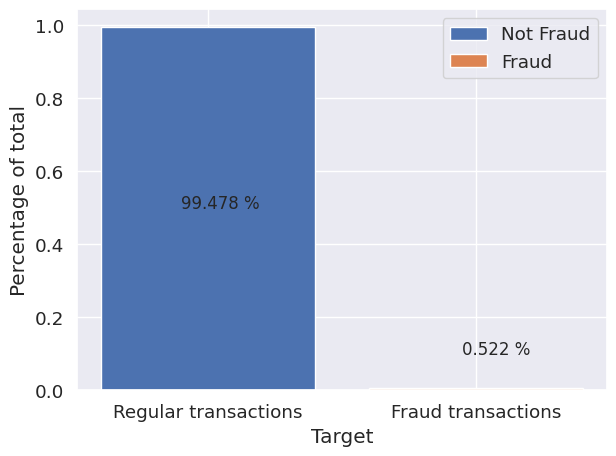

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio_ones = merged_df.Class.mean()
ratio_zeros = (len(merged_df) - merged_df.Class.sum())/len(merged_df)

plt.bar('Regular transactions', height=ratio_zeros, label='Not Fraud')
plt.bar('Fraud transactions', height=ratio_ones, label='Fraud')
plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()

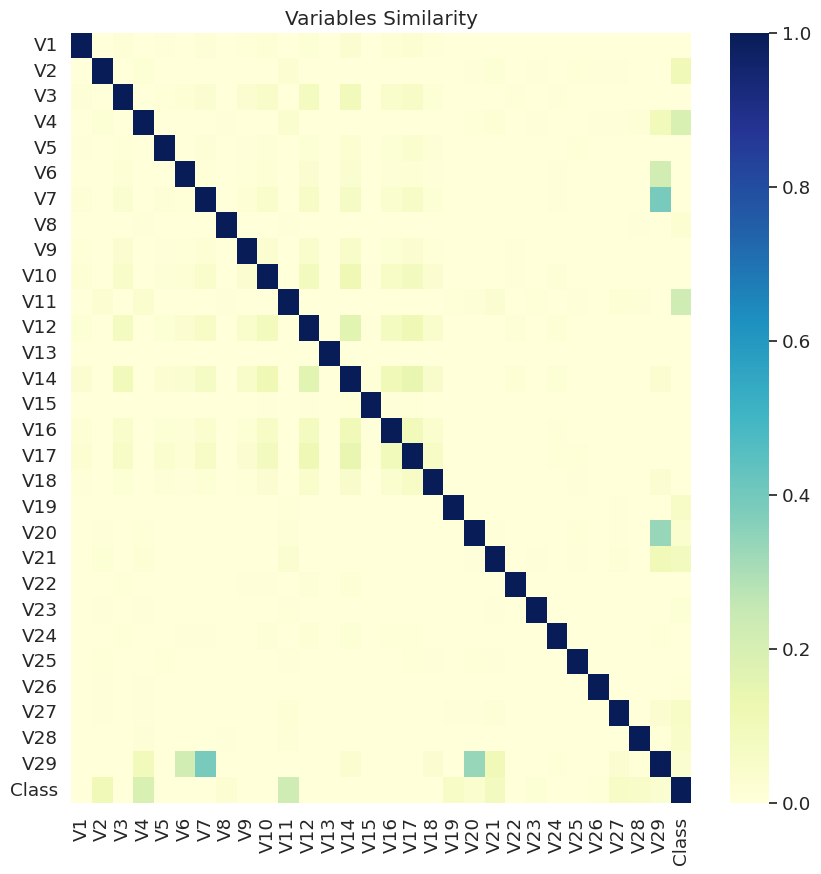

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
def plot_similarity(labels, features, rotation):
    corr = features.corr()
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Variables Similarity")

plot_similarity(merged_df.columns, merged_df, 90)


### **GAN + KNN**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_classifier.predict(X_virgin_test)

# AUROC
auroc = roc_auc_score(y_virgin_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_virgin_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_virgin_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_virgin_test, y_pred_knn)
print("Precision:    ", precision)


AUROC:         0.9233902515705213
AUPR:          0.7643494026606633
Recall:        0.8469387755102041
Precision:     0.9021739130434783


In [ ]:
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

## **OVERSAMPLİNG**

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 227451, 1: 394})

### **Oversampling + Random Forest**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(sampling_strategy=0.75)
X_train_ns, y_train_ns = rs.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_virgin_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 227451, 1: 170588})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.8979503907640715
AUPR:          0.786194562571733
Recall:        0.7959183673469388
Precision:     0.9873417721518988


### **Oversampling + KNN**

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)


In [ ]:

# AUROC
auroc = roc_auc_score(y_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:    ", precision)

AUROC:         0.9282988483800949
AUPR:          0.6263327344087515
Recall:        0.8571428571428571
Precision:     0.7304347826086957


## **Undersampling**

In [ ]:
from imblearn.under_sampling import NearMiss

# Create a NearMiss object
nr = NearMiss(sampling_strategy=0.8)

# Fit and resample the data
X_train_ns, y_train_ns = nr.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 492, 1: 394})


### **Undersampling + Random Forest**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.6028815261332445
AUPR:          0.002167604297230821
Recall:        0.9795918367346939
Precision:     0.002176920111567156


### **Undersampling + KNN**

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
# AUROC
auroc = roc_auc_score(y_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:    ", precision)

AUROC:         0.8689486838629655
AUPR:          0.008430083850003739
Recall:        0.9081632653061225
Precision:     0.009108586633916692


## **SMOTE**

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(sampling_strategy=1)
X_train_ns, y_train_ns = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 227451, 1: 227451})


### **SMOTE + Random Forest**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.9233726657517257
AUPR:          0.7480922522519337
Recall:        0.8469387755102041
Precision:     0.8829787234042553


### **SMOTE + KNN**

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
# AUROC
auroc = roc_auc_score(y_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:    ", precision)

AUROC:         0.9329172791795389
AUPR:          0.43136558955124715
Recall:        0.8673469387755102
Precision:     0.49707602339181284


## **ADSYN**


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

adsyn = ADASYN(sampling_strategy=0.75, random_state=42)
X_train_ns, y_train_ns = adsyn.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 227451, 1: 170557})


### **ADSYN + Random Forest**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.9182794178447969
AUPR:          0.7460661596437196
Recall:        0.8367346938775511
Precision:     0.8913043478260869


### **ADSYN + KNN**

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_ns, y_train_ns)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
# AUROC
auroc = roc_auc_score(y_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:    ", precision)

AUROC:         0.9329172791795389
AUPR:          0.43136558955124715
Recall:        0.8673469387755102
Precision:     0.49707602339181284


## **Imblanced Data**

### **Random Forest**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:    ", precision)

AUROC:         0.8775422274987654
AUPR:          0.7454553471260349
Recall:        0.7551020408163265
Precision:     0.9866666666666667


### **KNN**

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_classifier.predict(X_test)
# AUROC
auroc = roc_auc_score(y_test, y_pred_knn)
print("AUROC:        ", auroc)

# AUPR
aupr = average_precision_score(y_test, y_pred_knn)
print("AUPR:         ", aupr)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:       ", recall)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:    ", precision)

AUROC:         0.887711137493827
AUPR:          0.7280254262235566
Recall:        0.7755102040816326
Precision:     0.9382716049382716
